# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle

# Load Wine Quality Dataset

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, delimiter=';')

# Define features and target

In [3]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Train-Test Split (80%-20%)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Hyperparameter tuning for Random Forest

In [6]:
param_grid = {
    'n_estimators': [100, 200],  # Reduced values
    'max_depth': [5, 10],  # Avoid very deep trees
    'min_samples_split': [2, 5],  # Less split options
    'min_samples_leaf': [1, 2]  # Smaller range
}

# Grid Search with Parallel Processing (n_jobs=-1)
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), 
                           param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Best model selection
rf_model = grid_search.best_estimator_
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Optimized Random Forest Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Optimized Random Forest Accuracy: 0.64

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.71      0.76      0.73       130
           6       0.60      0.70      0.65       132
           7       0.58      0.33      0.42        42
           8       0.00      0.00      0.00         5

    accuracy                           0.64       320
   macro avg       0.31      0.30      0.30       320
weighted avg       0.61      0.64      0.62       320



C:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

# Confusion Matrix

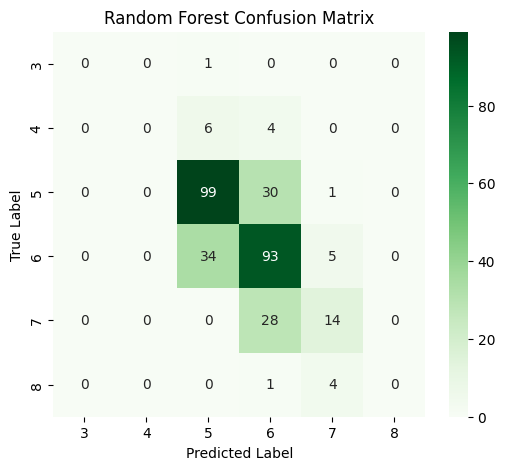

In [7]:
plt.figure(figsize=(6,5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Random Forest Confusion Matrix")
plt.show()

# Feature Importance Plot

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4884\4061581547.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=features, palette="viridis")


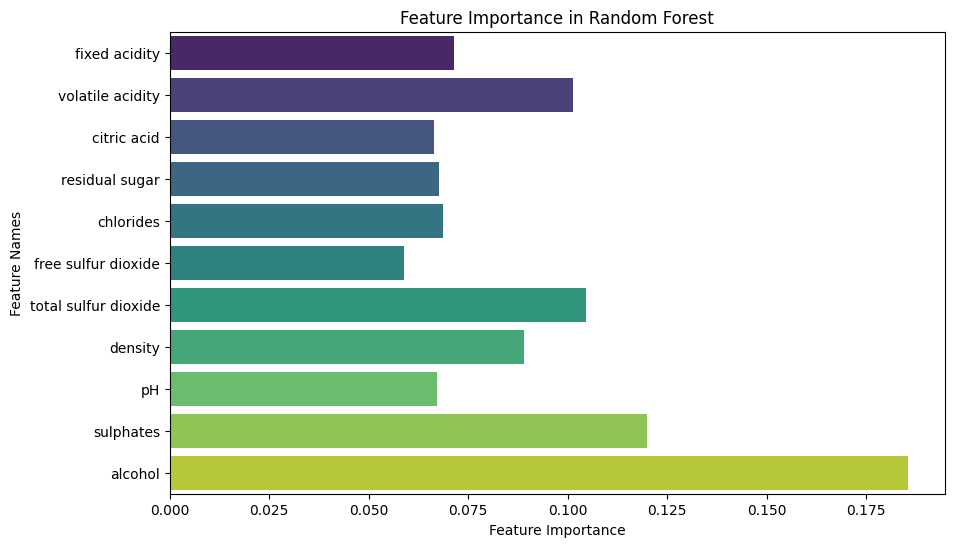

In [8]:
feature_importance = rf_model.feature_importances_
features = df.columns[:-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=features, palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Feature Names")
plt.title("Feature Importance in Random Forest")
plt.show()

# ROC Curve and AUC Score

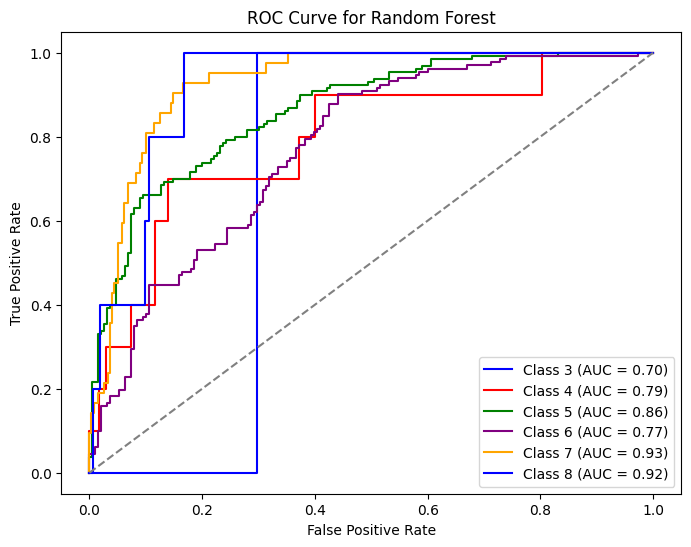

In [9]:
y_bin = label_binarize(y_test, classes=np.unique(y))
y_score = rf_model.predict_proba(X_test)

plt.figure(figsize=(8, 6))
colors = cycle(["blue", "red", "green", "purple", "orange"])
for i, color in zip(range(len(np.unique(y))), colors):
    fpr, tpr, _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, label=f'Class {np.unique(y)[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random Forest")
plt.legend()
plt.show()